# <p style="font-family:Bradley Hand ITC;font-size:150%;text-align:center;color:#1ECBC7;">Project:- Titanic EDA for Young DataScienctist</p>

# <p style="font-family:Bradley Hand ITC;font-size:150%;text-align:center;color:#1ECBC7;">Discription of Dataset</p>
**Two main subsets are included in the Titanic data set: a training set (855)train.csv and a test set (855)test.csv The result of each passenger's survival or no survival shall be reported in the training set, which serves as a basic fact. This set is used to build machine learning models, leveraging features such as gender, ticket class and potential engineered aspects. However, the results of the tests are not available, and the task is to predict the survival of each passenger using a trained model**

**A sample submission file (gender_submission.csv) is included, demonstrating predictions where only female passengers are assumed to survive, offering guidance on the format of the submission file**

# <p style="font-family:Bradley Hand ITC;font-size:100%;color:#1ECBC7;">Data Dictionary</p>

1. Survival represent Binary indicator (0 for No, 1 for Yes)
2. Pclass represent Ticket class representing socio-economic status (1 for 1st, 2 for 2nd, 3 for 3rd)
3. Sex represent Gender of the passenger
4. Age represent Age of the passenger in years (fractional if less than 1, and in the form of xx.5 if estimated)
5. Sibsp represent Number of siblings/spouses aboard the Titanic
6. Parch represent Number of parents/children aboard the Titanic
7. Ticket represent Ticket number
8. Fare represent Passenger fare
9. Cabin represent Cabin number
10. Embarked represent Port of Embarkation (C for Cherbourg, Q for Queenstown, S for Southampton)

# <p style="font-family:Bradley Hand ITC;font-size:100%;color:#1ECBC7;">Variable Notes</p>

* Pclass represents socio-economic status, categorized as Upper (1st), Middle (2nd), and Lower (3rd) class.
* Age represents Fractional if less than 1, with estimated ages denoted as xx.5.
* Sibsp & Parch represents Define family relations, including siblings, spouses, parents, and children. Some children traveled solely with a nanny, leading to a parch value of 0 for them.

**This dataset offers a rich array of features for predictive modeling, encouraging exploration and analysis to uncover insights regarding survival patterns aboard the Titanic**

# <p style="font-family:Bradley Hand ITC;font-size:150%;text-align:center;color:#1ECBC7;">Introduction of me</p>

### ***👋 Greetings, all! I'm <strong>Mohsin Saleem<strong>, a data scientist that is interested about mastering <strong>machine learning<strong> techniques and continually extending his expertise. I believe in the mindset of continuous learning and support because I am dedicated to the continued development and support of others in the profession***
##  <span style="color: #1ECBC7;"></span> <span style="color: blue; font-weight: bold;"> Connect with me :</span>
[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/Mohsin-Sial099) 

[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mohsinsial) 

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/mohsinsial/)

# <p style="font-family:Bradley Hand ITC;font-size:150%;text-align:center;color:#1ECBC7;">Import Necessary Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# <p style="font-family:Bradley Hand ITC;font-size:150%;text-align:center;color:#1ECBC7;">Load DATASET</p>

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [5]:
print(("Head of Train Data"),train_df.head())
print(("Shape of Train Data"), train_df.shape)

Head of Train Data    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

In [6]:
print(("Head of Test Data"),test_df.head())
print(("Shape of Test Data"), test_df.shape)

Head of Test Data    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Shape of Test Data (418, 11)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


Null Values in Train data
Age         177
Cabin       687
Embarked      2
dtype: int64


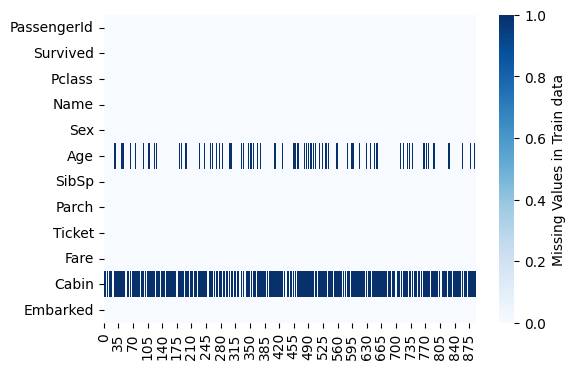

In [11]:
print("Null Values in Train data")
train_df_null  = train_df.isnull().sum()
print(train_df_null[train_df_null>0])

plt.figure(figsize=(6, 4))
sns.heatmap(train_df.isna().transpose(), cmap="Blues", cbar_kws={'label': 'Missing Values in Train data'})
plt.show()

Null Values in Test data
Age       86
Fare       1
Cabin    327
dtype: int64


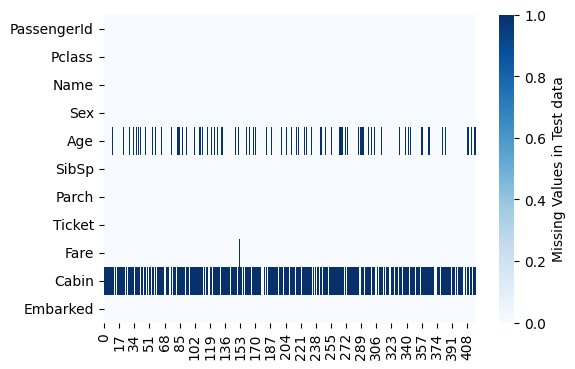

In [12]:
print("Null Values in Test data")
test_df_null  = test_df.isnull().sum()
print(test_df_null[test_df_null>0])

plt.figure(figsize=(6, 4))
sns.heatmap(test_df.isna().transpose(), cmap="Blues", cbar_kws={'label': 'Missing Values in Test data'})
plt.show()

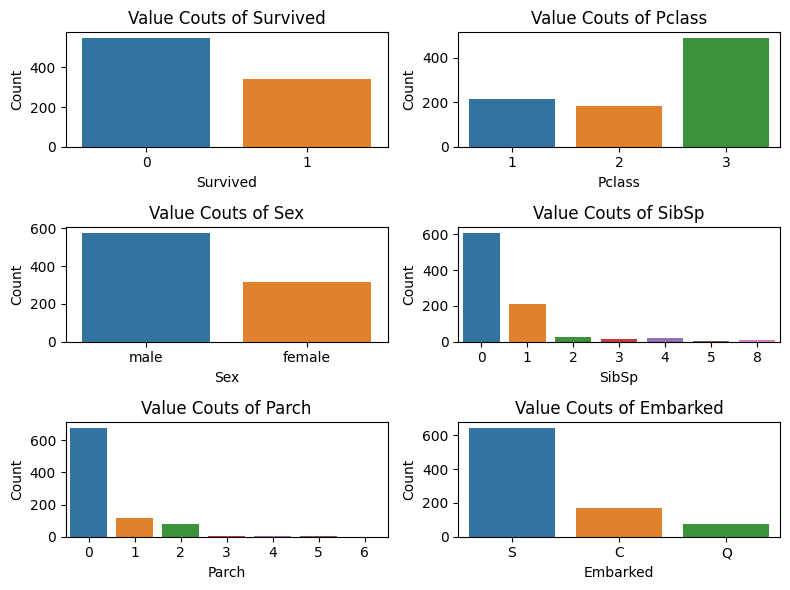

In [13]:
traindf_pl = [train_df['Survived'], train_df['Pclass'], train_df['Sex'], train_df['SibSp'], train_df['Parch'], train_df['Embarked']]
plot_names = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=traindf_pl[i], ax=ax)
    ax.set_title(f'Value Couts of {plot_names[i]}')
    ax.set_xlabel(plot_names[i])
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

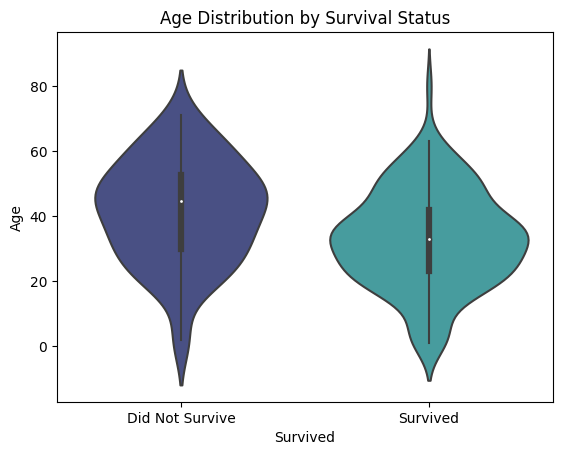

In [14]:
sns.violinplot(x='Survived', y='Age', data=train_df.dropna(), palette="mako", as_cmap=True, split=True);
plt.title('Age Distribution by Survival Status'); 
plt.xlabel('Survived'); plt.ylabel('Age'); 
plt.xticks([0, 1], ['Did Not Survive', 'Survived']); plt.show()

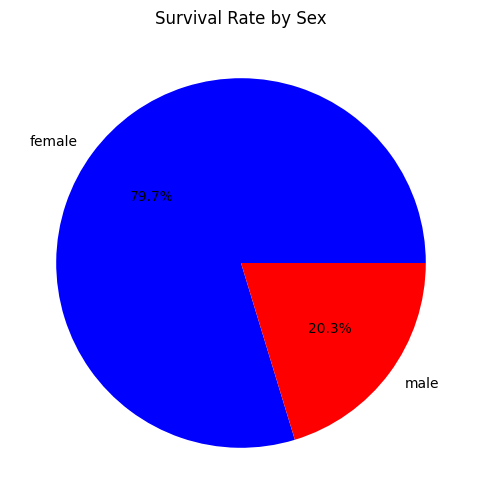

In [15]:
survived_sex = train_df.groupby(['Sex'])['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.pie(survived_sex, labels=survived_sex.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Survival Rate by Sex')
plt.show()

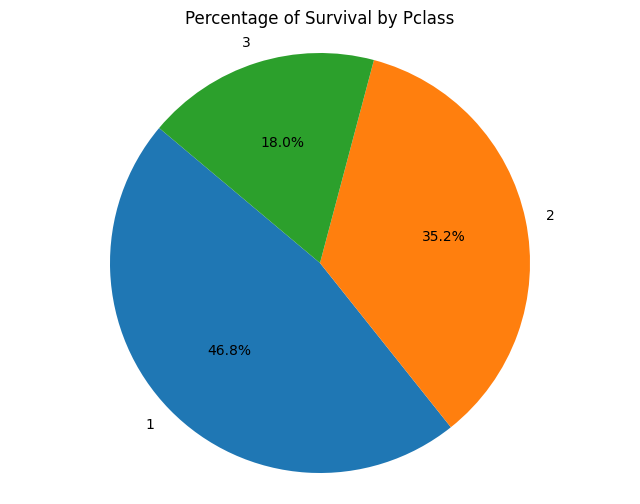

In [16]:
survived_percentage = train_df.groupby('Pclass')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
plt.pie(survived_percentage, labels=survived_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Survival by Pclass')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

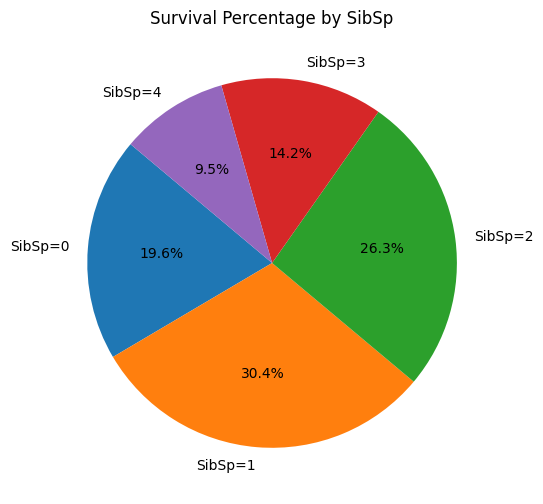

In [17]:
survival_percentages = [train_df["Survived"][train_df["SibSp"] == i].value_counts(normalize=True)[1] * 100 for i in range(5)]
plt.figure(figsize=(8, 6))
plt.pie(survival_percentages, labels=[f"SibSp={i}" for i in range(5)], autopct='%1.1f%%', startangle=140)
plt.title('Survival Percentage by SibSp')
plt.show()

**Clearly, people with more siblings or spouses on board had a lower chance of surviving. But people with no siblings or spouses were less likely to survive than those who had only one or two, contrary to what was predicted. 19.6% to 30.4%, vs. 26.3%**

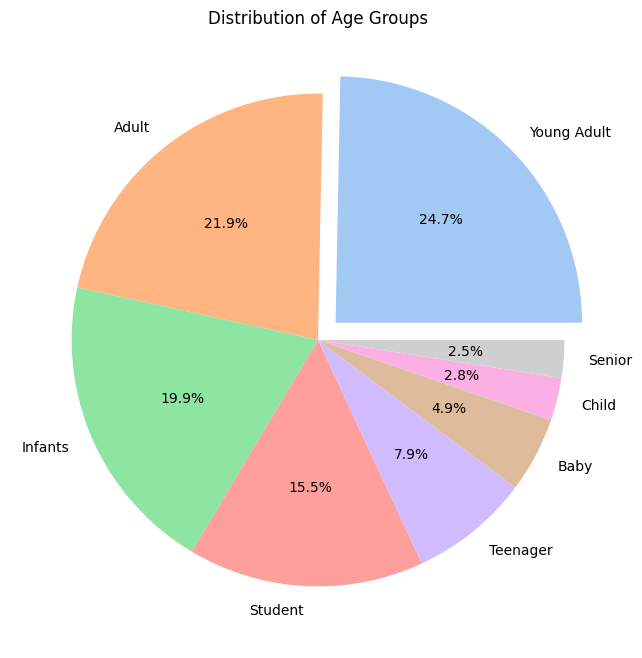

In [18]:
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Infants', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels=labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels=labels)
plt.figure(figsize=(8, 8))
train_df['AgeGroup'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), explode=(0.1, 0, 0, 0, 0, 0, 0, 0))
plt.title('Distribution of Age Groups')
plt.ylabel('')
plt.show()

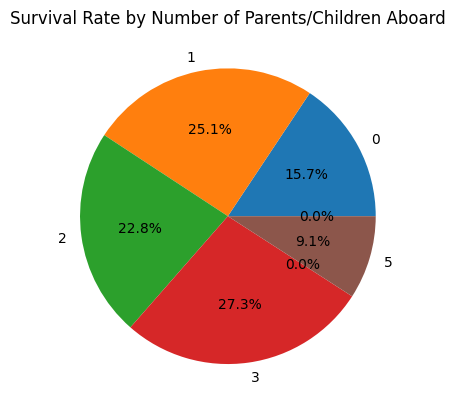

In [19]:
train_df.groupby('Parch')['Survived'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

**The probability of survival is higher for those on board with four or fewer parents and children. And, the odds of survival are lower for people who go on their own as opposed to families with three or more parents and children**

In [20]:
test_df[['Age', 'Fare', 'Cabin']] = test_df[['Age', 'Fare', 'Cabin']].apply(lambda x: x.fillna(x.mean() if x.name in ['Age', 'Fare'] else "Unknown"))

In [21]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True); train_df['Embarked'].fillna("S", inplace=True); train_df['Cabin'].fillna("Unknown", inplace=True)

In [22]:
train_df['Sex'].replace(["male", "female"], [1, 0], inplace=True)

In [23]:
test_df['Sex'].replace(["male", "female"], [1, 0], inplace=True)


In [24]:
train_df.drop(columns=['Name','Ticket', 'Cabin'], inplace=True)


In [25]:
test_df.drop(columns=['Name','Ticket', 'Cabin'], inplace=True)


In [26]:
test_df = pd.get_dummies(test_df, columns=['Embarked'])

In [27]:
train_df = pd.get_dummies(train_df, columns=['Embarked'])

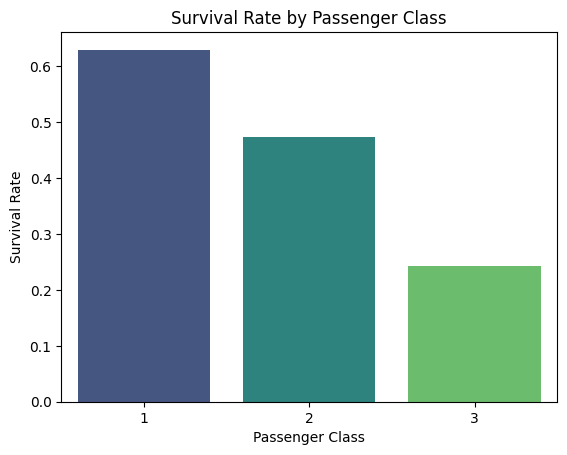

In [28]:
survival_rate_by_class = train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x=survival_rate_by_class.index, y='Survived', data=survival_rate_by_class, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()